Generador de Gráficas de los test realizados 

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
file_location = r'Resumen.xlsx'
xls = pd.ExcelFile(file_location)
sheets = xls.sheet_names
df = pd.read_excel(file_location, sheet_name=sheets[0])
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,HQC,NaN,NaN,Kyber,NaN,NaN,Saber,NaN,NaN
1,NaN,NaN,PSOC,Portatil,Torre,PSOC,Portatil,Torre,PSOC,Portatil,Torre
2,Avg Cycles,KeyGen,-,22894712,29662124,3410769,932350,843638,7141561,1242686,997477
3,NaN,Encaps,-,44027046,58501993,4096689,525175,577068,8790967,478775,539840
4,NaN,Decas,-,67662397,89393547,4116277,306341,405905,9771075,246269,303053
5,Operations 1 Second,KeyGen,-,99,123,30,3481,5823,15,2571,4741
6,NaN,Encaps,-,51,64,25,4796,7312,12,4022,7410
7,NaN,Decas,-,33,42,25,7687,10001,11,7000,11852
8,Stack Depth (bytes),KeyGen,-,102688,102688,16080,30032,30032,20384,27952,27952
9,NaN,Encaps,-,160560,160560,19760,19544,19544,23512,23192,23192


In [3]:
Headers_df =df.iloc[2:11, 1]
Headers_df

2     KeyGen
3     Encaps
4      Decas
5     KeyGen
6     Encaps
7      Decas
8     KeyGen
9     Encaps
10     Decas
Name: Unnamed: 1, dtype: object

In [4]:
HQC_df=df.iloc[1:11, 2:5]
HQC_df.columns = HQC_df.iloc[0]
HQC_df = HQC_df.iloc[1:]
HQC_df.index = Headers_df
HQC_df.index.name = None
HQC_df.columns.name = None
HQC_df = HQC_df.apply(pd.to_numeric, errors='coerce')
HQC_df

,PSOC,Portatil,Torre
KeyGen,NaN,22894712,29662124
Encaps,NaN,44027046,58501993
Decas,NaN,67662397,89393547
KeyGen,NaN,99,123
Encaps,NaN,51,64
Decas,NaN,33,42
KeyGen,NaN,102688,102688
Encaps,NaN,160560,160560
Decas,NaN,175072,175072


In [5]:
kyber_df=df.iloc[1:11, 5:8]
kyber_df.columns = kyber_df.iloc[0]
kyber_df = kyber_df.iloc[1:]
kyber_df.index = Headers_df
kyber_df.index.name = None
kyber_df.columns.name = None
kyber_df = kyber_df.apply(pd.to_numeric, errors='coerce')
kyber_df

,PSOC,Portatil,Torre
KeyGen,3410769,932350,843638
Encaps,4096689,525175,577068
Decas,4116277,306341,405905
KeyGen,30,3481,5823
Encaps,25,4796,7312
Decas,25,7687,10001
KeyGen,16080,30032,30032
Encaps,19760,19544,19544
Decas,21336,21112,21112


In [6]:
saber_df=df.iloc[1:11, 8:11]
saber_df.columns = saber_df.iloc[0]
saber_df = saber_df.iloc[1:]
saber_df.index = Headers_df
saber_df.index.name = None
saber_df.columns.name = None
saber_df = saber_df.apply(pd.to_numeric, errors='coerce')
saber_df


,PSOC,Portatil,Torre
KeyGen,7141561,1242686,997477
Encaps,8790967,478775,539840
Decas,9771075,246269,303053
KeyGen,15,2571,4741
Encaps,12,4022,7410
Decas,11,7000,11852
KeyGen,20384,27952,27952
Encaps,23512,23192,23192
Decas,24992,24664,24664


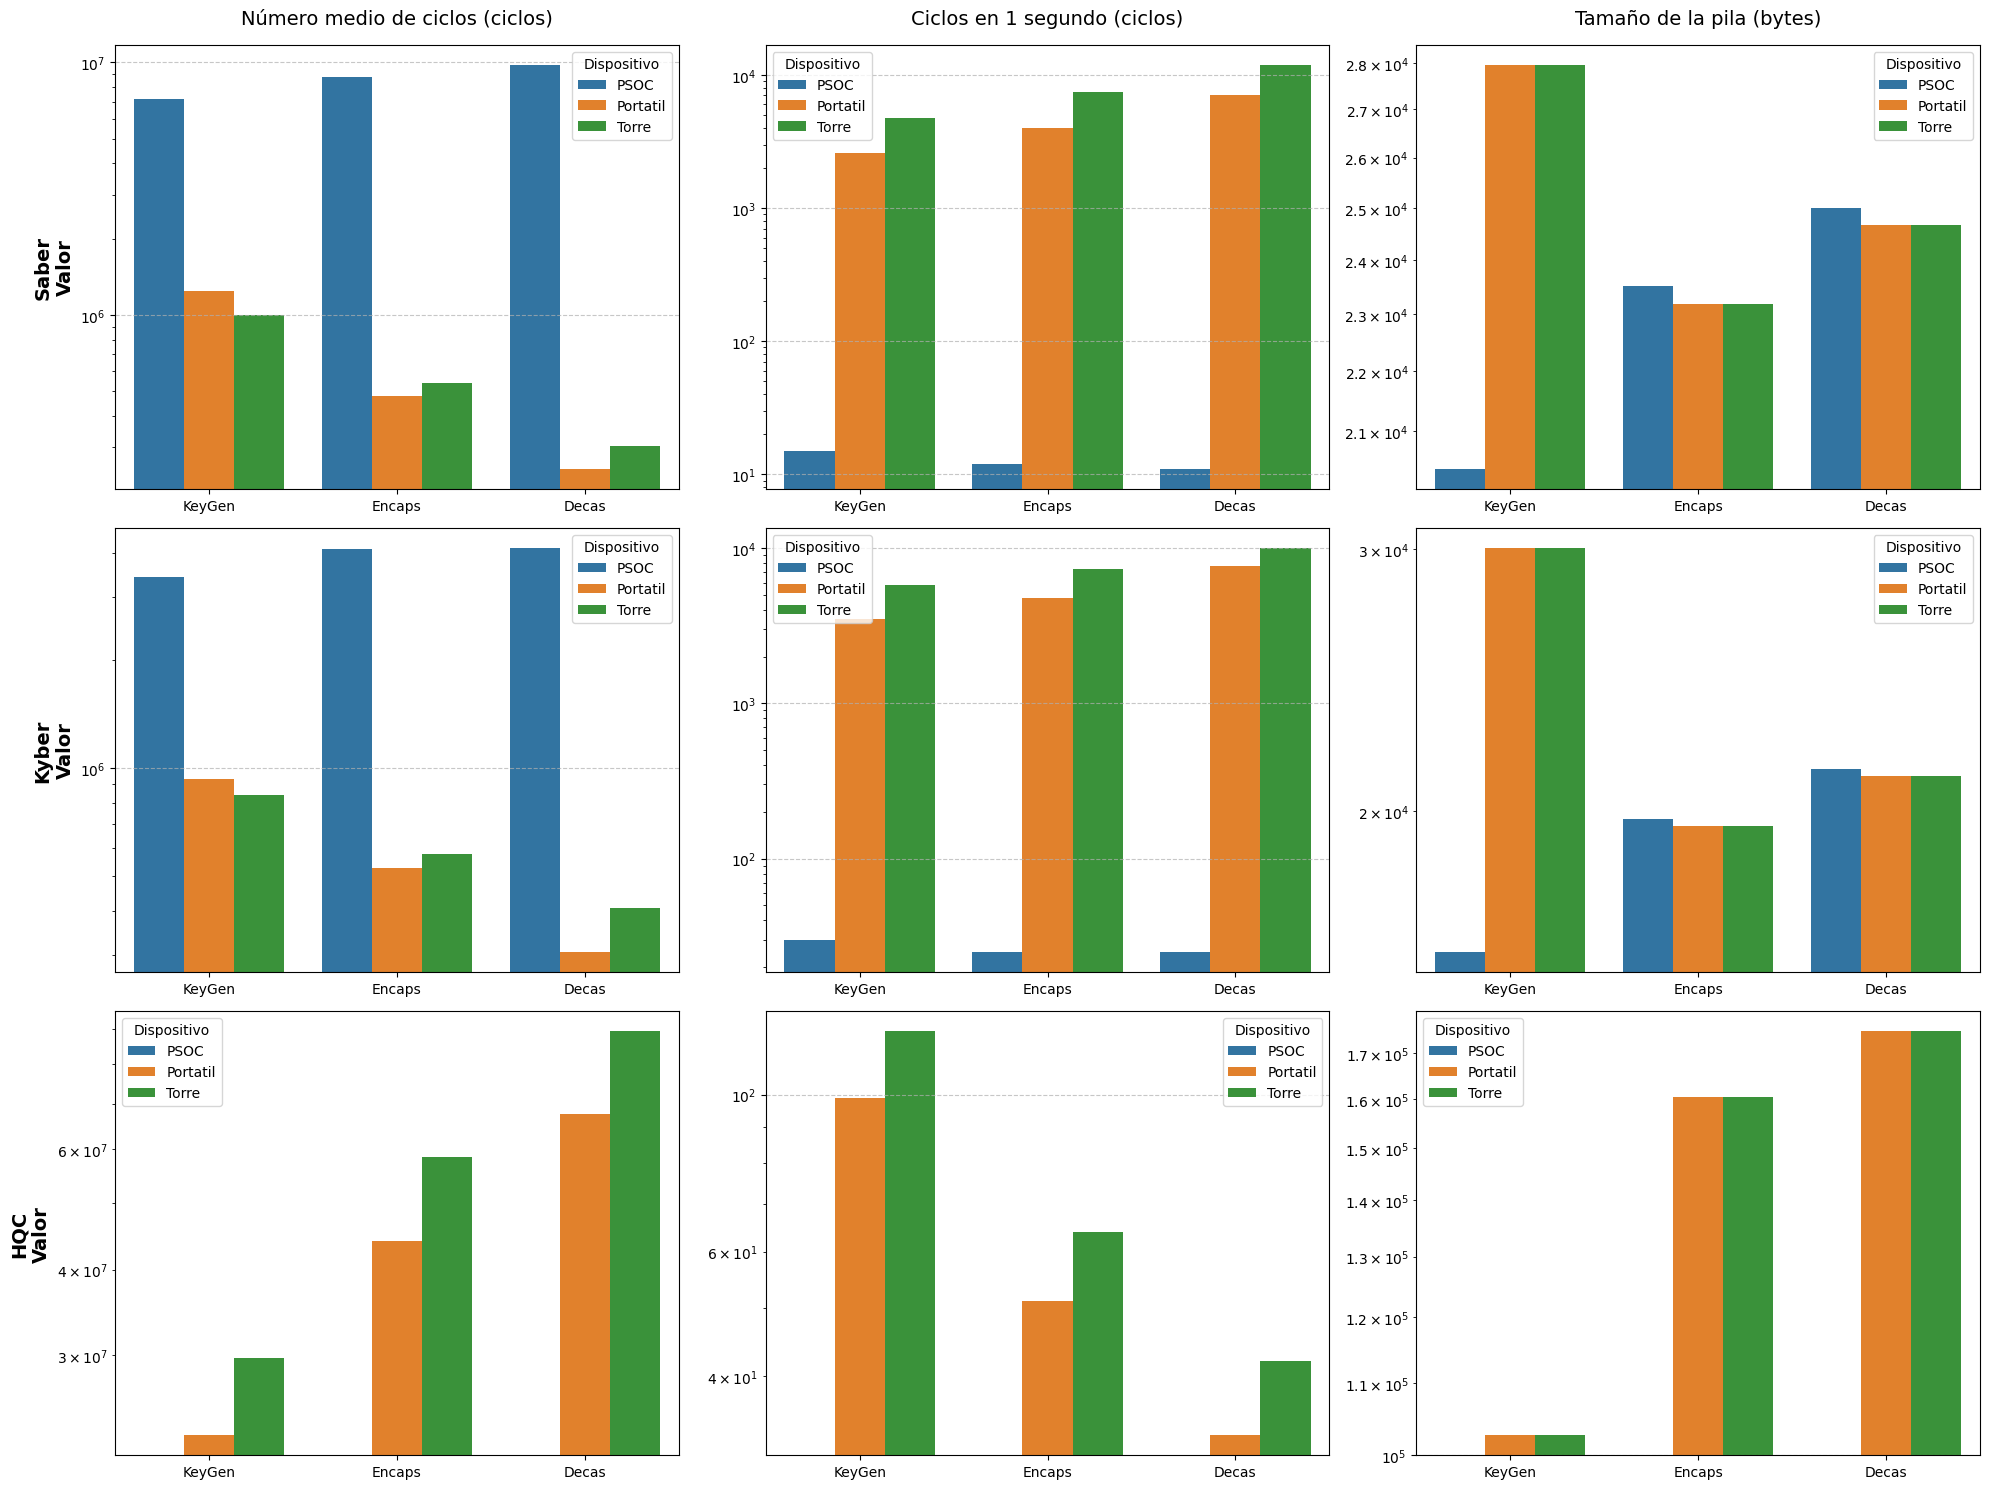

In [7]:
datasets = [("Saber", saber_df), ("Kyber", kyber_df), ("HQC", HQC_df)]
metric_titles = ["Número medio de ciclos (ciclos)", "Ciclos en 1 segundo (ciclos)", "Tamaño de la pila (bytes)"]

custom_palette = {
    'PSOC': 'tab:blue',
    'Portatil': 'tab:orange',
    'Torre': 'tab:green'
}

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for row_idx, (name, df2) in enumerate(datasets):
    slices = [df2.iloc[0:3], df2.iloc[3:6], df2.iloc[6:9]]
    
    for col_idx, slice_df in enumerate(slices):
        ax = axes[row_idx, col_idx]
        
        data_slice = slice_df.reset_index()
        data_slice = data_slice.rename(columns={'index': 'Operación'})
        
        data_melted = data_slice.melt(id_vars='Operación', var_name='Dispositivo', value_name='Valor')
        
        sns.barplot(
            data=data_melted, 
            x='Operación',      
            y='Valor',         
            hue='Dispositivo', 
            ax=ax,
            palette=custom_palette,            
            hue_order=['PSOC', 'Portatil', 'Torre'] 
        )
        
        ax.set_yscale('log')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xlabel("")
        
        if row_idx == 0:
            ax.set_title(metric_titles[col_idx], fontsize=14, pad=15)
            
        if col_idx == 0:
            ax.set_ylabel(f"{name}\nValor", fontsize=14, fontweight='bold')
        else:
            ax.set_ylabel("")

plt.tight_layout()
plt.show()

In [8]:
df_psoc = df.iloc[2:11, 5:11:3]
df_psoc.index = Headers_df
df_psoc.index.name = None
df_psoc.columns = ['Kyber', 'Saber']
df_psoc.columns.name = None
df_psoc = df_psoc.apply(pd.to_numeric, errors='coerce')
df_psoc

,Kyber,Saber
KeyGen,3410769,7141561
Encaps,4096689,8790967
Decas,4116277,9771075
KeyGen,30,15
Encaps,25,12
Decas,25,11
KeyGen,16080,20384
Encaps,19760,23512
Decas,21336,24992


In [9]:
df_portatil= df.iloc[2:11, 3:11:3]
df_portatil.index = Headers_df
df_portatil.index.name = None
df_portatil.columns = ['HQC', 'Kyber', 'Saber']
df_portatil.columns.name = None
df_portatil = df_portatil.apply(pd.to_numeric, errors='coerce')
df_portatil

,HQC,Kyber,Saber
KeyGen,22894712,932350,1242686
Encaps,44027046,525175,478775
Decas,67662397,306341,246269
KeyGen,99,3481,2571
Encaps,51,4796,4022
Decas,33,7687,7000
KeyGen,102688,30032,27952
Encaps,160560,19544,23192
Decas,175072,21112,24664


In [10]:
df_torre= df.iloc[2:11, 4:11:3]
df_torre.index = Headers_df
df_torre.index.name = None
df_torre.columns = ['HQC', 'Kyber', 'Saber']
df_torre.columns.name = None
df_torre = df_torre.apply(pd.to_numeric, errors='coerce')
df_torre

,HQC,Kyber,Saber
KeyGen,29662124,843638,997477
Encaps,58501993,577068,539840
Decas,89393547,405905,303053
KeyGen,123,5823,4741
Encaps,64,7312,7410
Decas,42,10001,11852
KeyGen,102688,30032,27952
Encaps,160560,19544,23192
Decas,175072,21112,24664


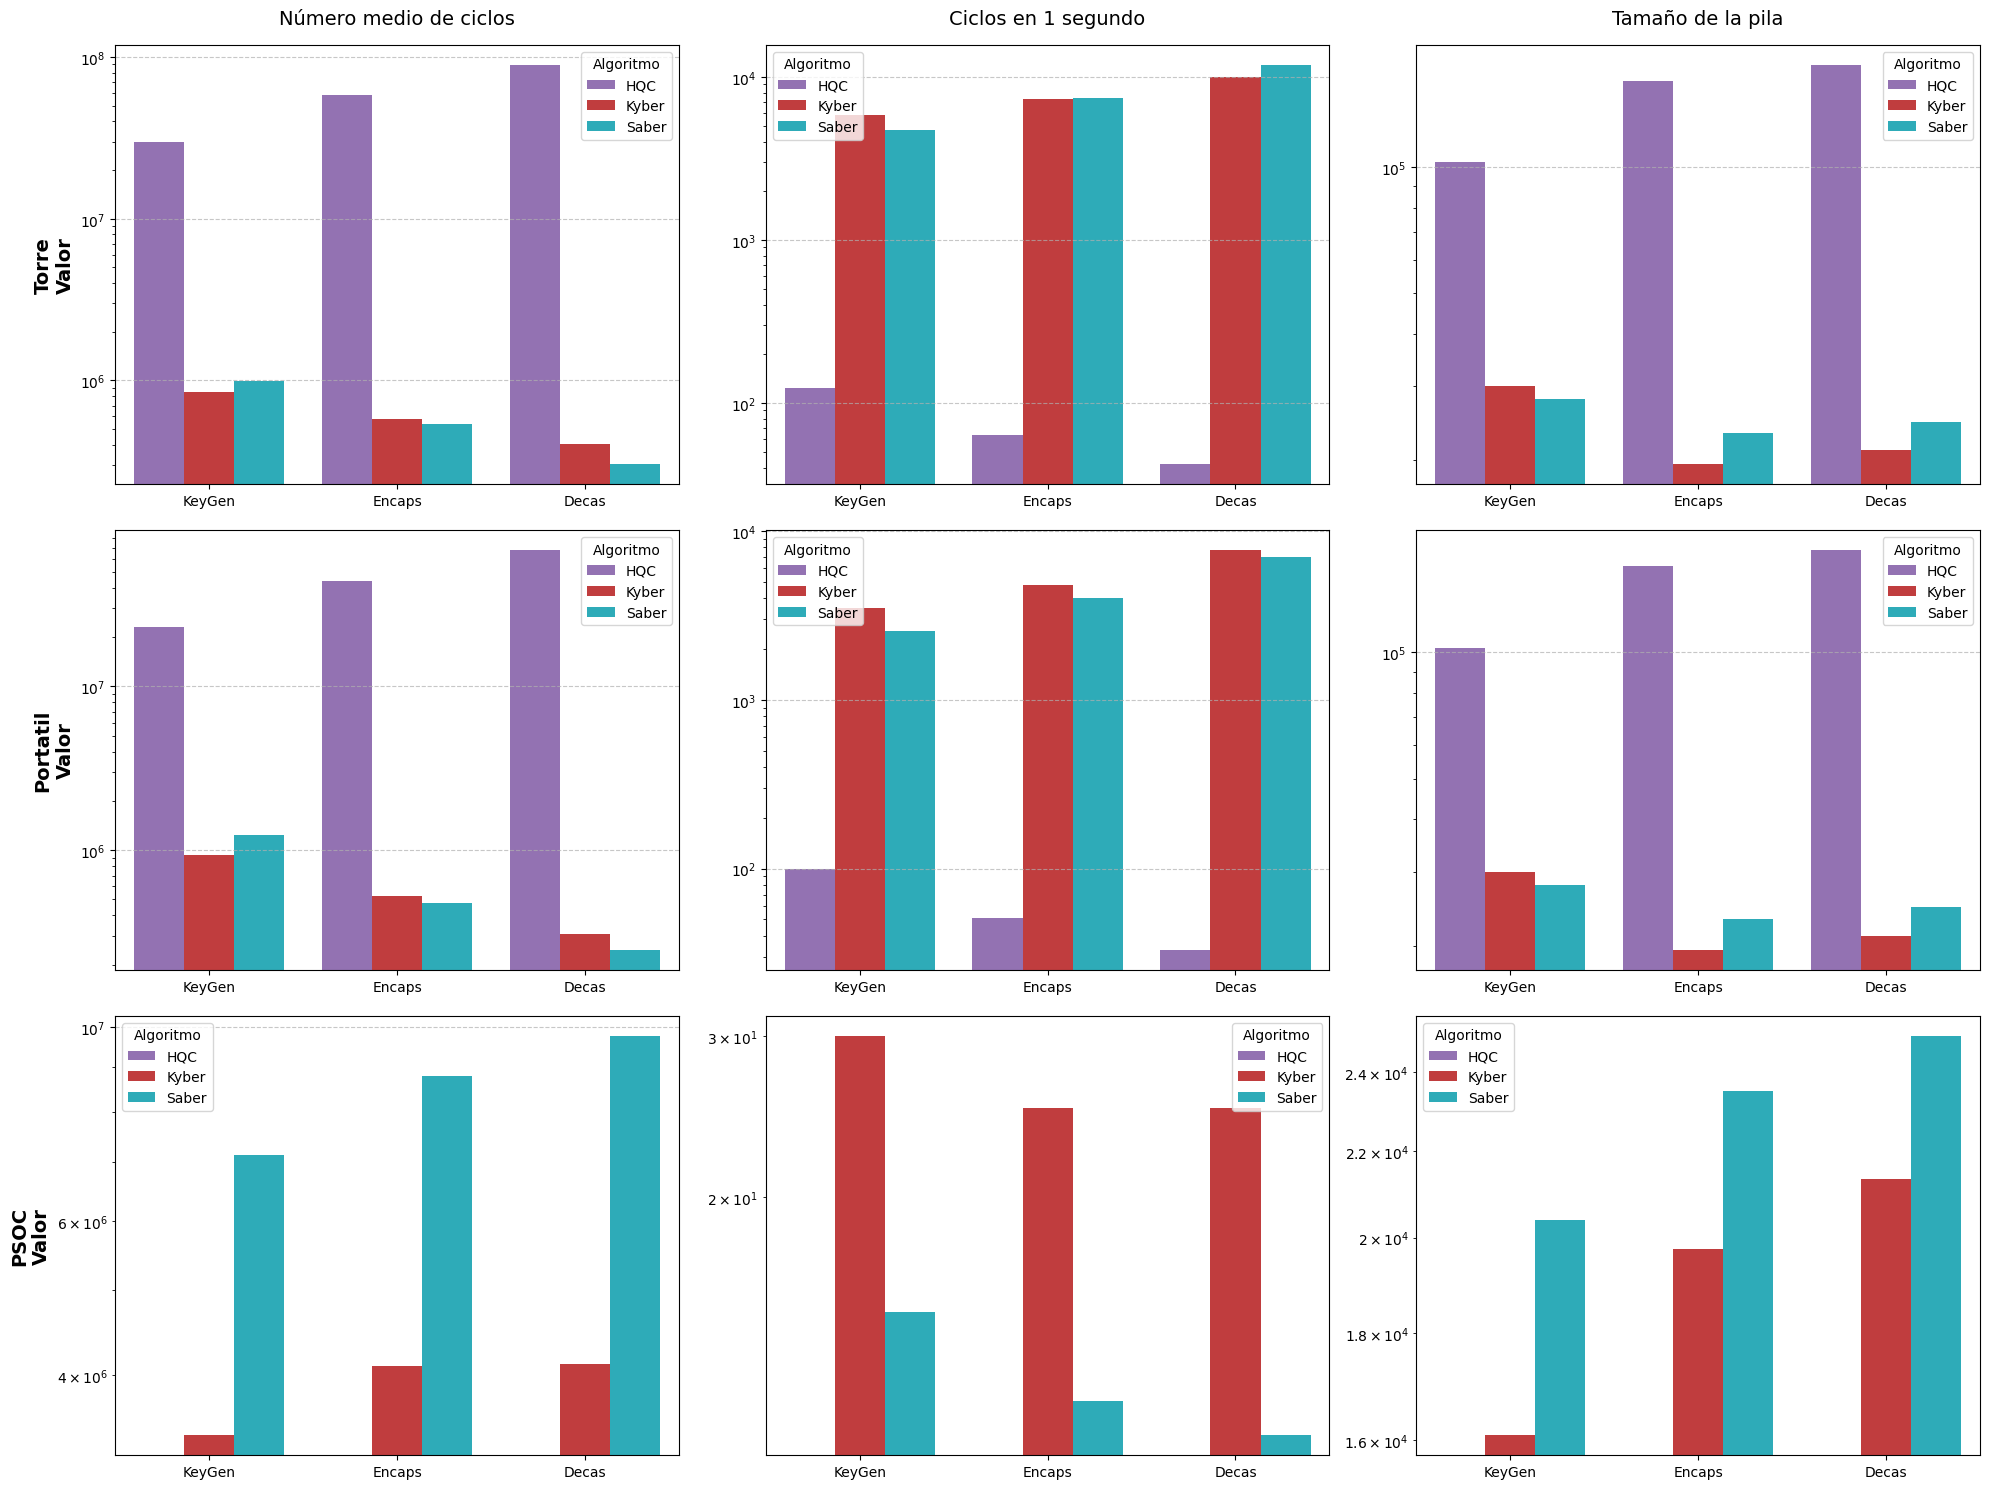

In [11]:
datasets = [("Torre", df_torre), ("Portatil", df_portatil), ("PSOC", df_psoc)]
metric_titles = ["Número medio de ciclos", "Ciclos en 1 segundo", "Tamaño de la pila"]

algo_palette = {
    'HQC': 'tab:purple',
    'Kyber': 'tab:red',
    'Saber': 'tab:cyan'
}

fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for row_idx, (dev_name, df_dev) in enumerate(datasets):
    slices = [df_dev.iloc[0:3], df_dev.iloc[3:6], df_dev.iloc[6:9]]
    
    for col_idx, slice_df in enumerate(slices):
        ax = axes[row_idx, col_idx]
        
        data_slice = slice_df.reset_index()
        data_slice = data_slice.rename(columns={'index': 'Operación'})
        
        data_melted = data_slice.melt(id_vars='Operación', var_name='Algoritmo', value_name='Valor')
        
        sns.barplot(
            data=data_melted, 
            x='Operación',      
            y='Valor',         
            hue='Algoritmo', 
            ax=ax,
            palette=algo_palette,            
            hue_order=['HQC', 'Kyber', 'Saber'] 
        )
        
        ax.set_yscale('log')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xlabel("")
        
        if row_idx == 0:
            ax.set_title(metric_titles[col_idx], fontsize=14, pad=15)
            
        if col_idx == 0:
            ax.set_ylabel(f"{dev_name}\nValor", fontsize=14, fontweight='bold')
        else:
            ax.set_ylabel("")

plt.tight_layout()
plt.show()

Parsing archivos .o

In [41]:
def plot_memory_breakdown(df, section_name,algName):
    # --- Plot 1: Overview Bar Chart ---
    file_totals = df.groupby('File')['Size'].sum().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    file_totals.plot(kind='bar', color='skyblue')
    plt.title(f'Total {section_name} Size by {algName} Object File')
    plt.xlabel('Object File')
    plt.ylabel(f'Total {section_name} Size (Bytes)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()  # Changed from savefig/close to show

    # --- Plot 2: Detailed Breakdown Grid ---
    unique_files = file_totals.index.tolist()
    num_files = len(unique_files)
    
    if num_files == 0:
        print(f"No files found for {section_name} section.")
        return

    cols = 4
    rows = math.ceil(num_files / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
    axes = axes.flatten()

    for i, filename in enumerate(unique_files):
        # Get components for this file
        file_data = df[df['File'] == filename].sort_values(by='Size', ascending=False)
        
        # Bundle small components into 'Other' if there are too many
        if len(file_data) > 5:
            top_5 = file_data.iloc[:5]
            other_size = file_data.iloc[5:]['Size'].sum()
            other_row = pd.DataFrame([{'Name': 'Other', 'Size': other_size}])
            plot_data = pd.concat([top_5[['Name', 'Size']], other_row], ignore_index=True)
        else:
            plot_data = file_data[['Name', 'Size']]

        # Bar plot for this subplot
        axes[i].bar(plot_data['Name'], plot_data['Size'], color=plt.cm.Paired(range(len(plot_data))))
        axes[i].set_title(f"{filename}\n(Total: {file_totals[filename]} bytes)")
        axes[i].set_ylabel('Size (Bytes)')
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show() # Changed from savefig/close to show

Kyber

In [16]:
file_location = r'Kyber_ble_data_semicolon.csv'
dfObjectKyber = pd.read_csv(file_location, sep=';')
dfObjectKyber

,Size,Type,Name,File,Address
0,49632,Code,crypto_hashblocks_sha512,sha512.o,0
1,49152,Zero,ucHeap,heap_1.o,4
2,7198,Code,crypto_hashblocks_sha256,sha256.o,0
3,4440,Code,KeccakF1600_StatePermute,fips202.o,0
4,4096,N,__StackLimit,startup_psoc6_01_cm4.o,0
...,...,...,...,...,...
797,1,Zero,initialized.14506,randombytes.o,0
798,1,Zero,UART_READY,main_cm4.o,0
799,1,Zero,wasEventSent,cy_syspm.o,0
800,1,Zero,UART_initVar,UART.o,0


In [17]:
objectFilesKyber = [
    "aes256ctr.o",
    "cbd.o",
    "fips202.o",
    "indcpa.o",
    "kem.o",
    "kyber_wrapper.o",
    "ntt.o",
    "poly.o",
    "polyvec.o",
    "randombytes.o",
    "reduce.o",
    "sha256.o",
    "sha512.o",
    "symmetric-aes.o",
    "symmetric-shake.o",
    "verify.o"
]

***Code***

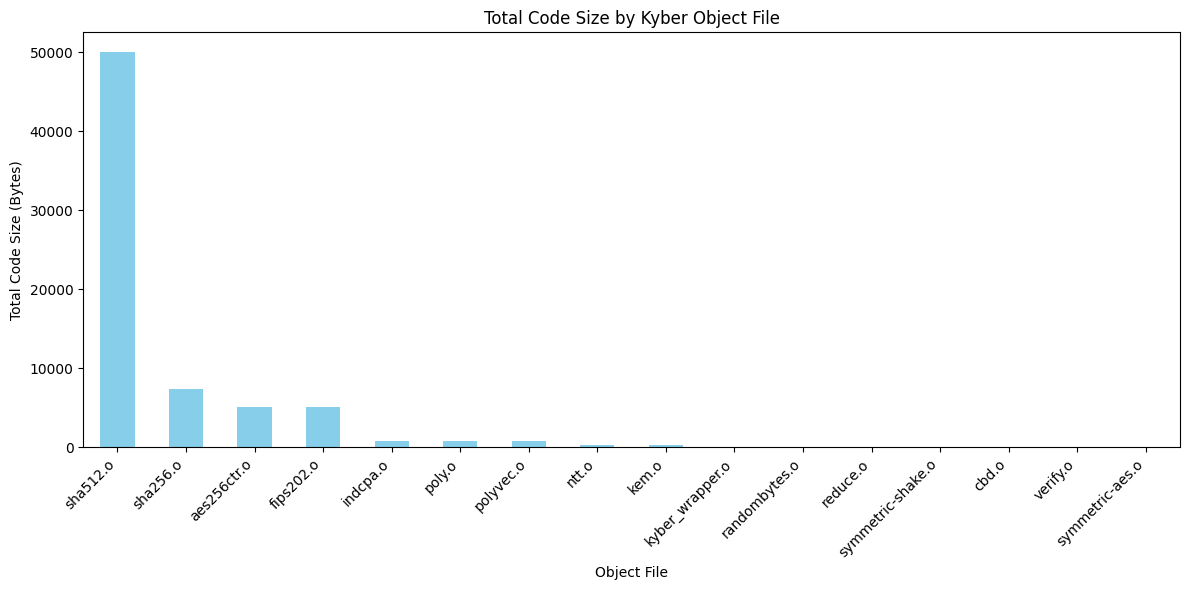

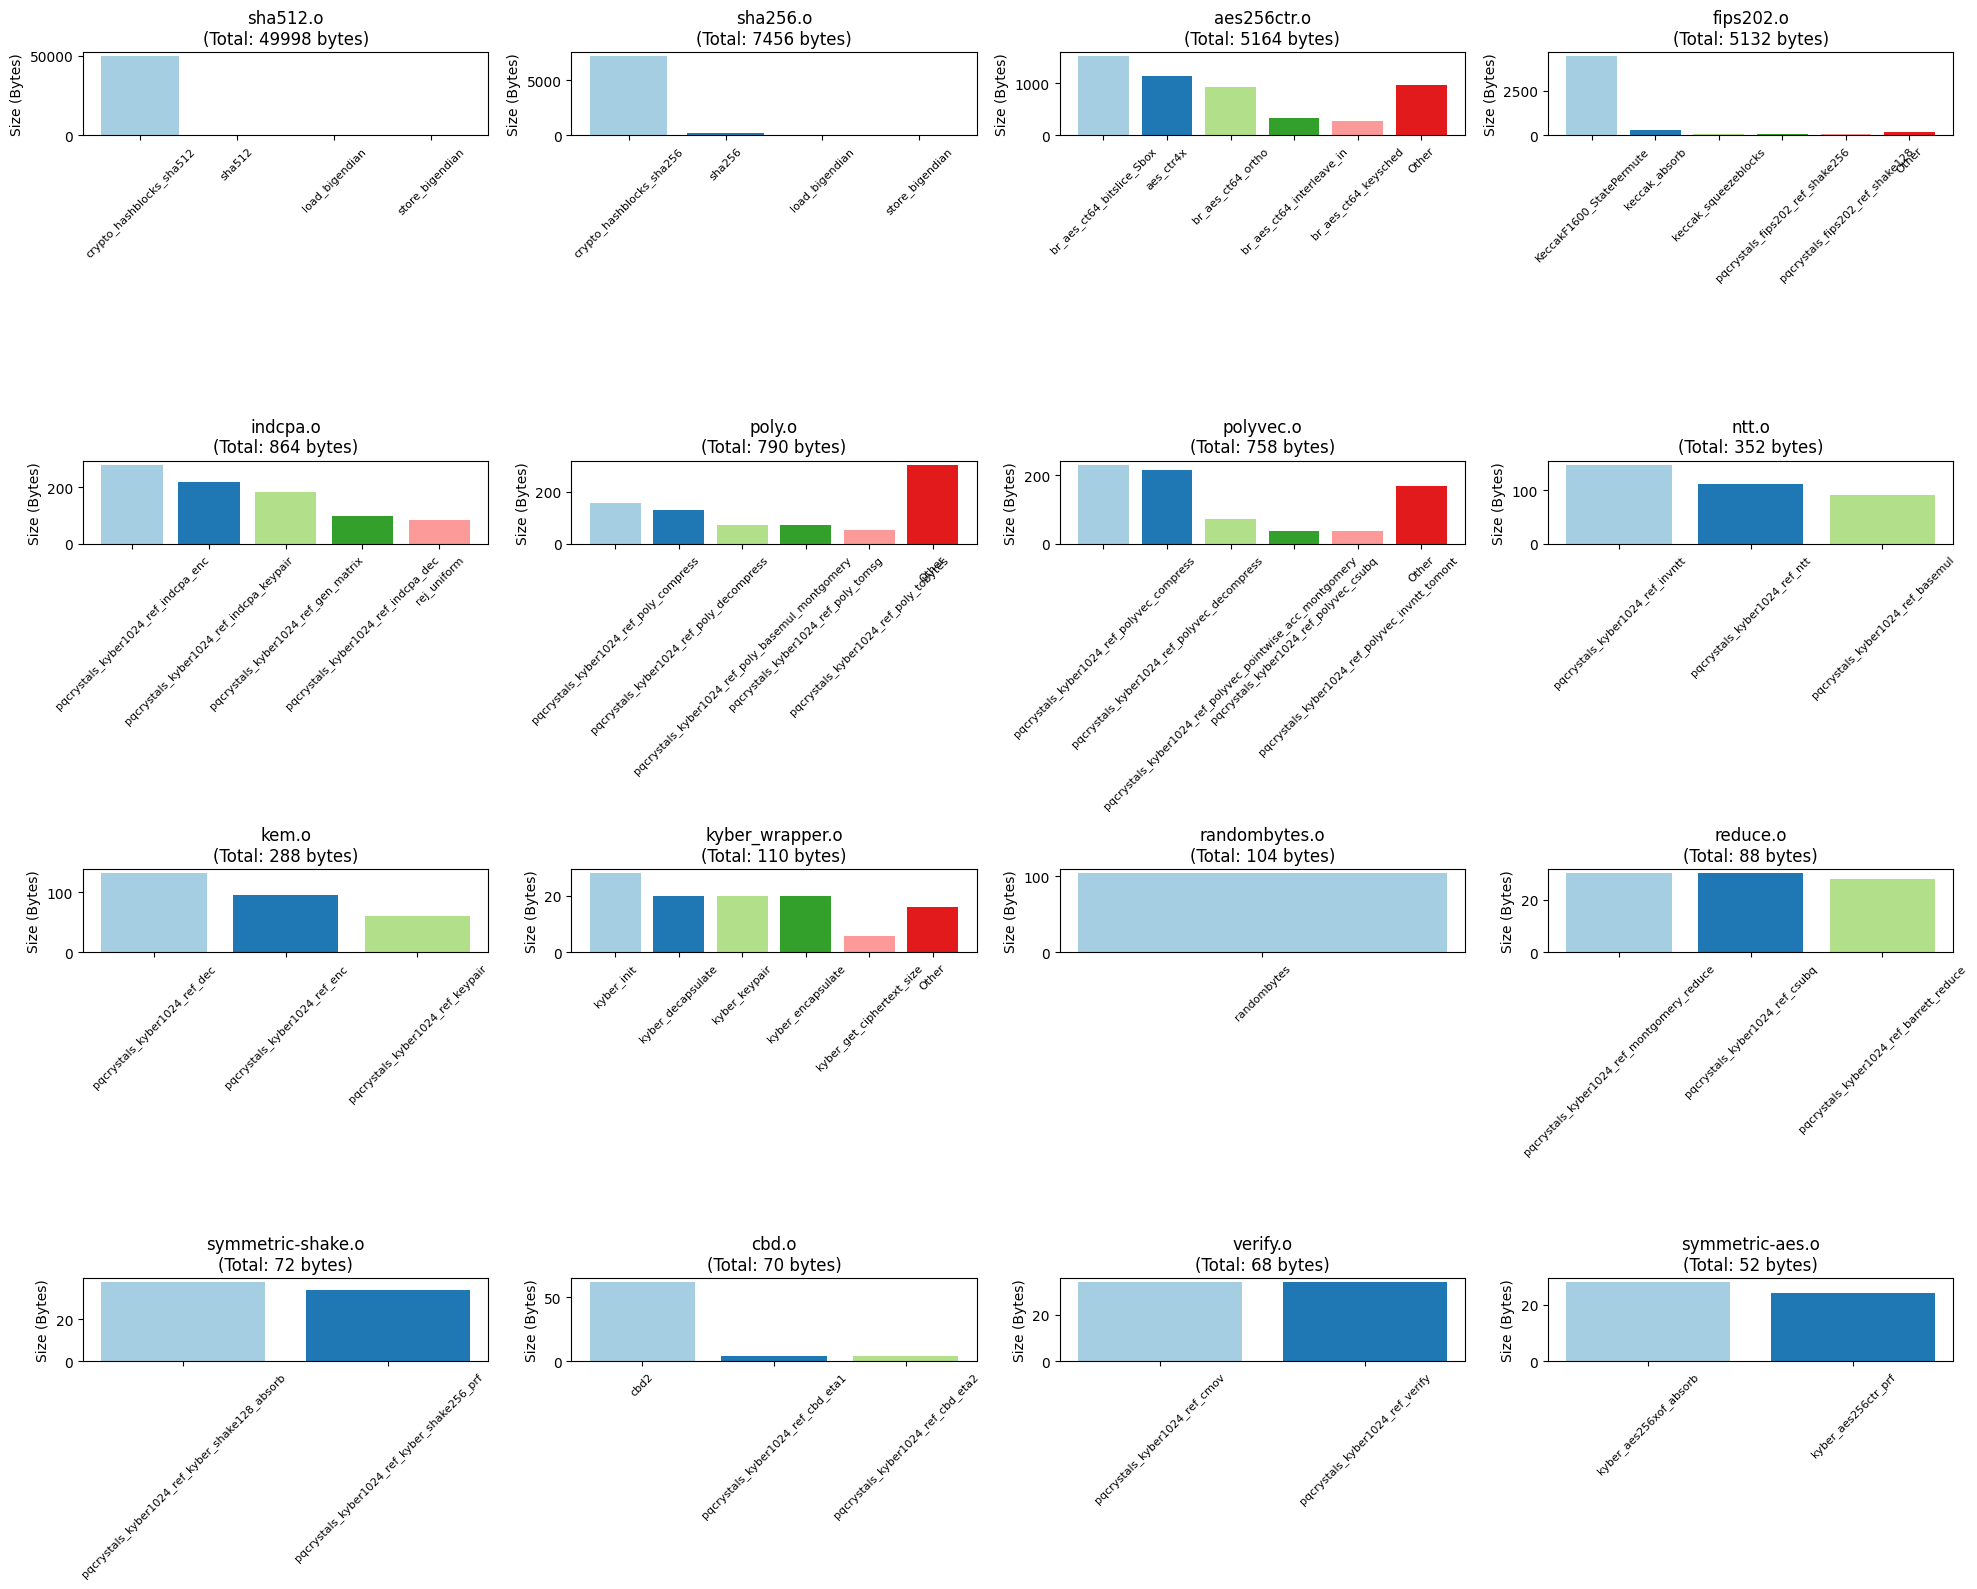

In [42]:
dfFilteredKyber = dfObjectKyber[dfObjectKyber['File'].isin(objectFilesKyber)]

dfKyberCode = dfFilteredKyber[dfFilteredKyber.Type == 'Code']
plot_memory_breakdown(dfKyberCode, "Code","Kyber")






***READ ONLY***

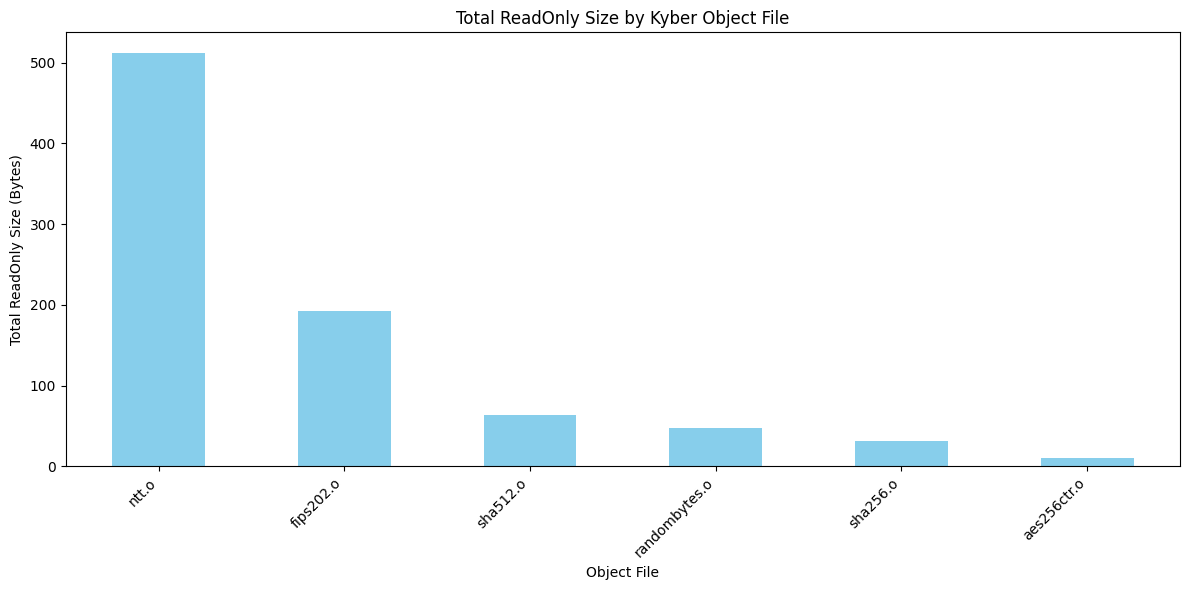

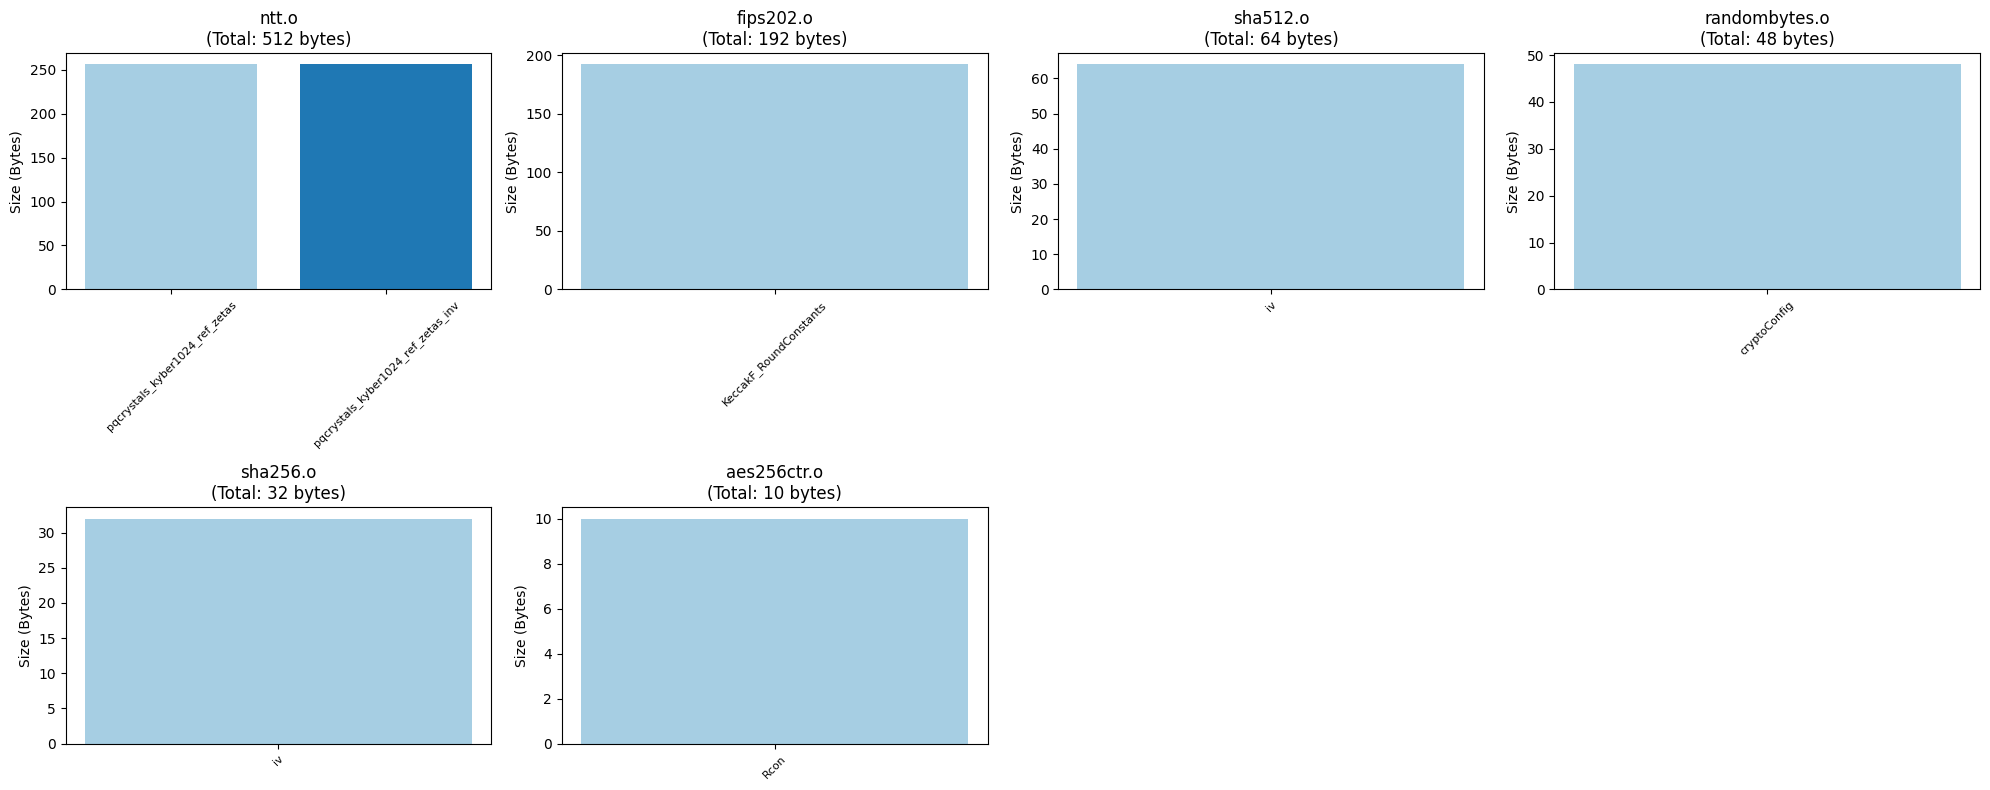

In [43]:
dfKyberReadOnly = dfFilteredKyber[dfFilteredKyber.Type == 'ReadOnly']
plot_memory_breakdown(dfKyberReadOnly, "ReadOnly","Kyber")

***Zero***

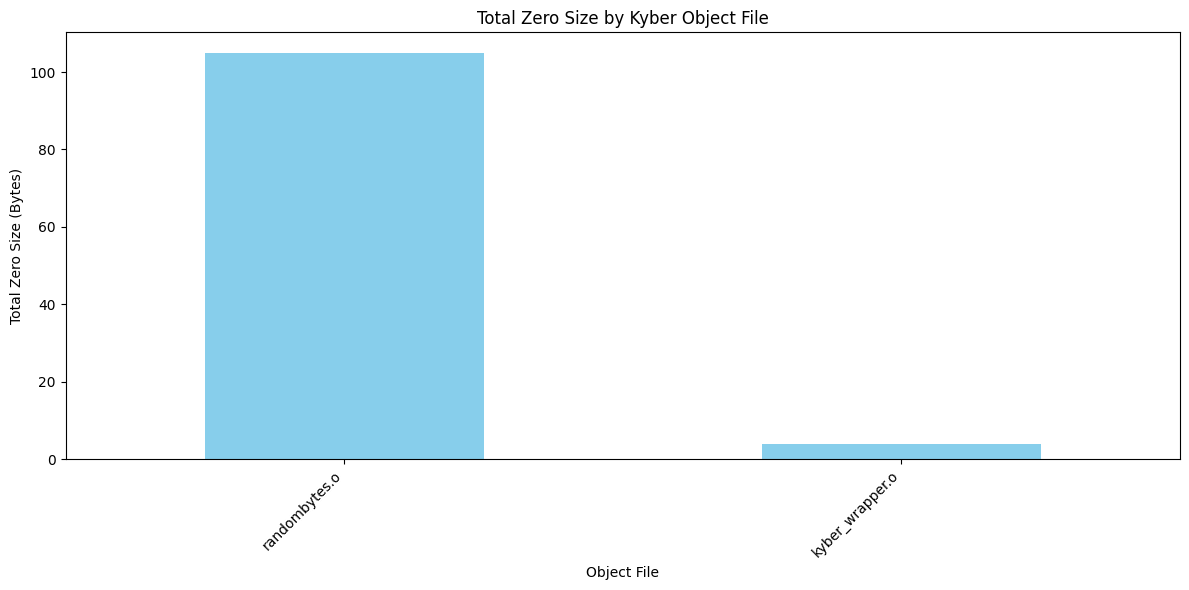

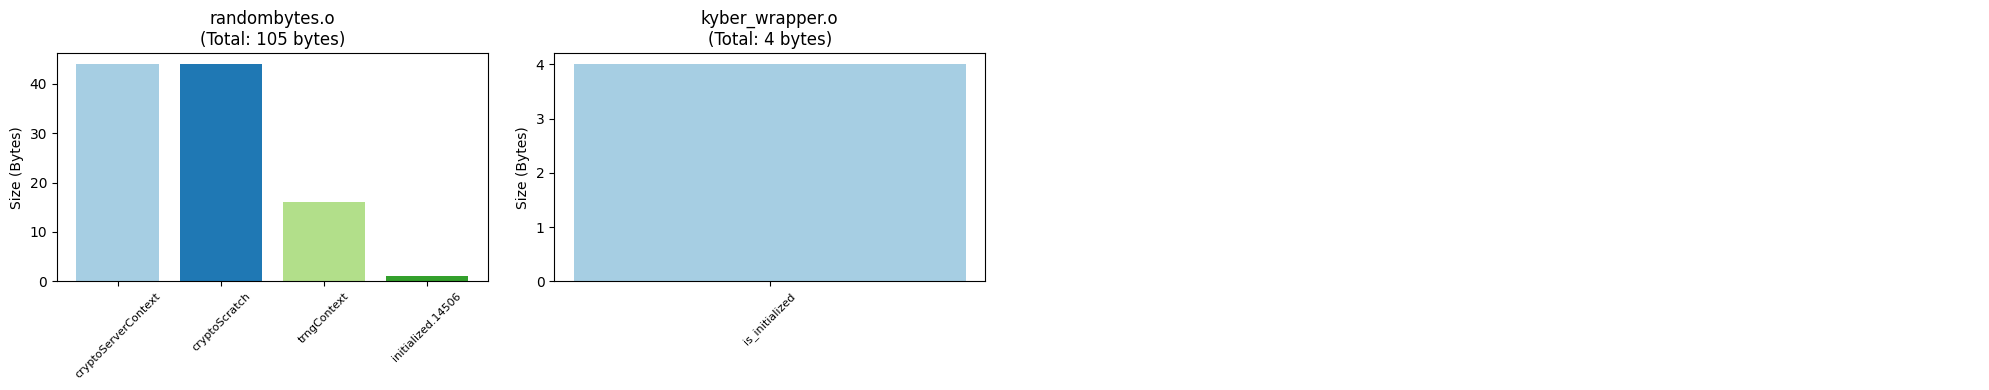

In [44]:
dfKyberZero = dfFilteredKyber[dfFilteredKyber.Type == 'Zero']
plot_memory_breakdown(dfKyberZero, "Zero","Kyber")

Saber

In [45]:
file_location = r'Saber_ble_data_semicolon.csv'
dfObjectSaber = pd.read_csv(file_location, sep=';')
dfObjectSaber

,Size,Type,Name,File,Address
0,49152,Zero,ucHeap,heap_4.o,12
1,4440,Code,KeccakF1600_StatePermute,fips202.o,0
2,4096,N,__StackLimit,startup_psoc6_01_cm4.o,0
3,1054,Code,Cy_SCB_I2C_SlaveInterrupt,cy_scb_i2c.o,0
4,1044,Code,Cy_BLE_EcoStart,cy_ble_clk.o,0
...,...,...,...,...,...
744,1,Zero,clkCounting,cy_sysclk.o,0
745,1,Zero,UART_READY,main_cm4.o,0
746,1,Zero,preventCounting,cy_sysclk.o,1
747,1,Zero,wasEventSent,cy_syspm.o,0


In [15]:
objectFilesSaber = [
    "cbd.o",
    "fips202.o",
    "kem.o",
    "pack_unpack.o",
    "poly.o",
    "poly_mul.o",
    "randombytes.o",
    "SABER_indcpa.o",
    "saber_wrapper.o",
    "verify.o"
]

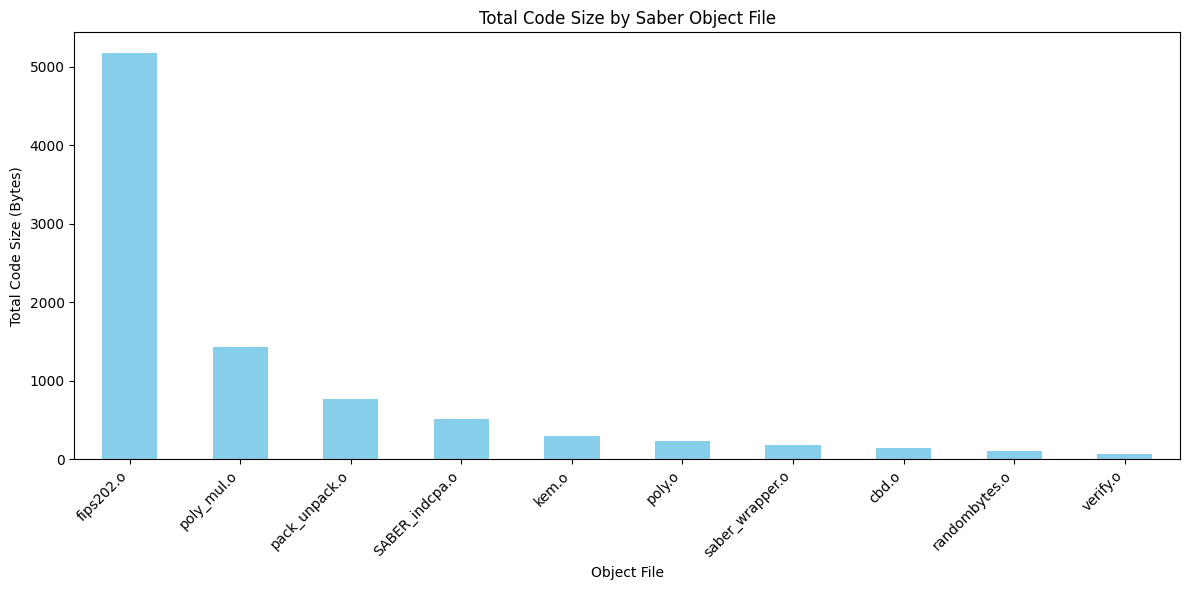

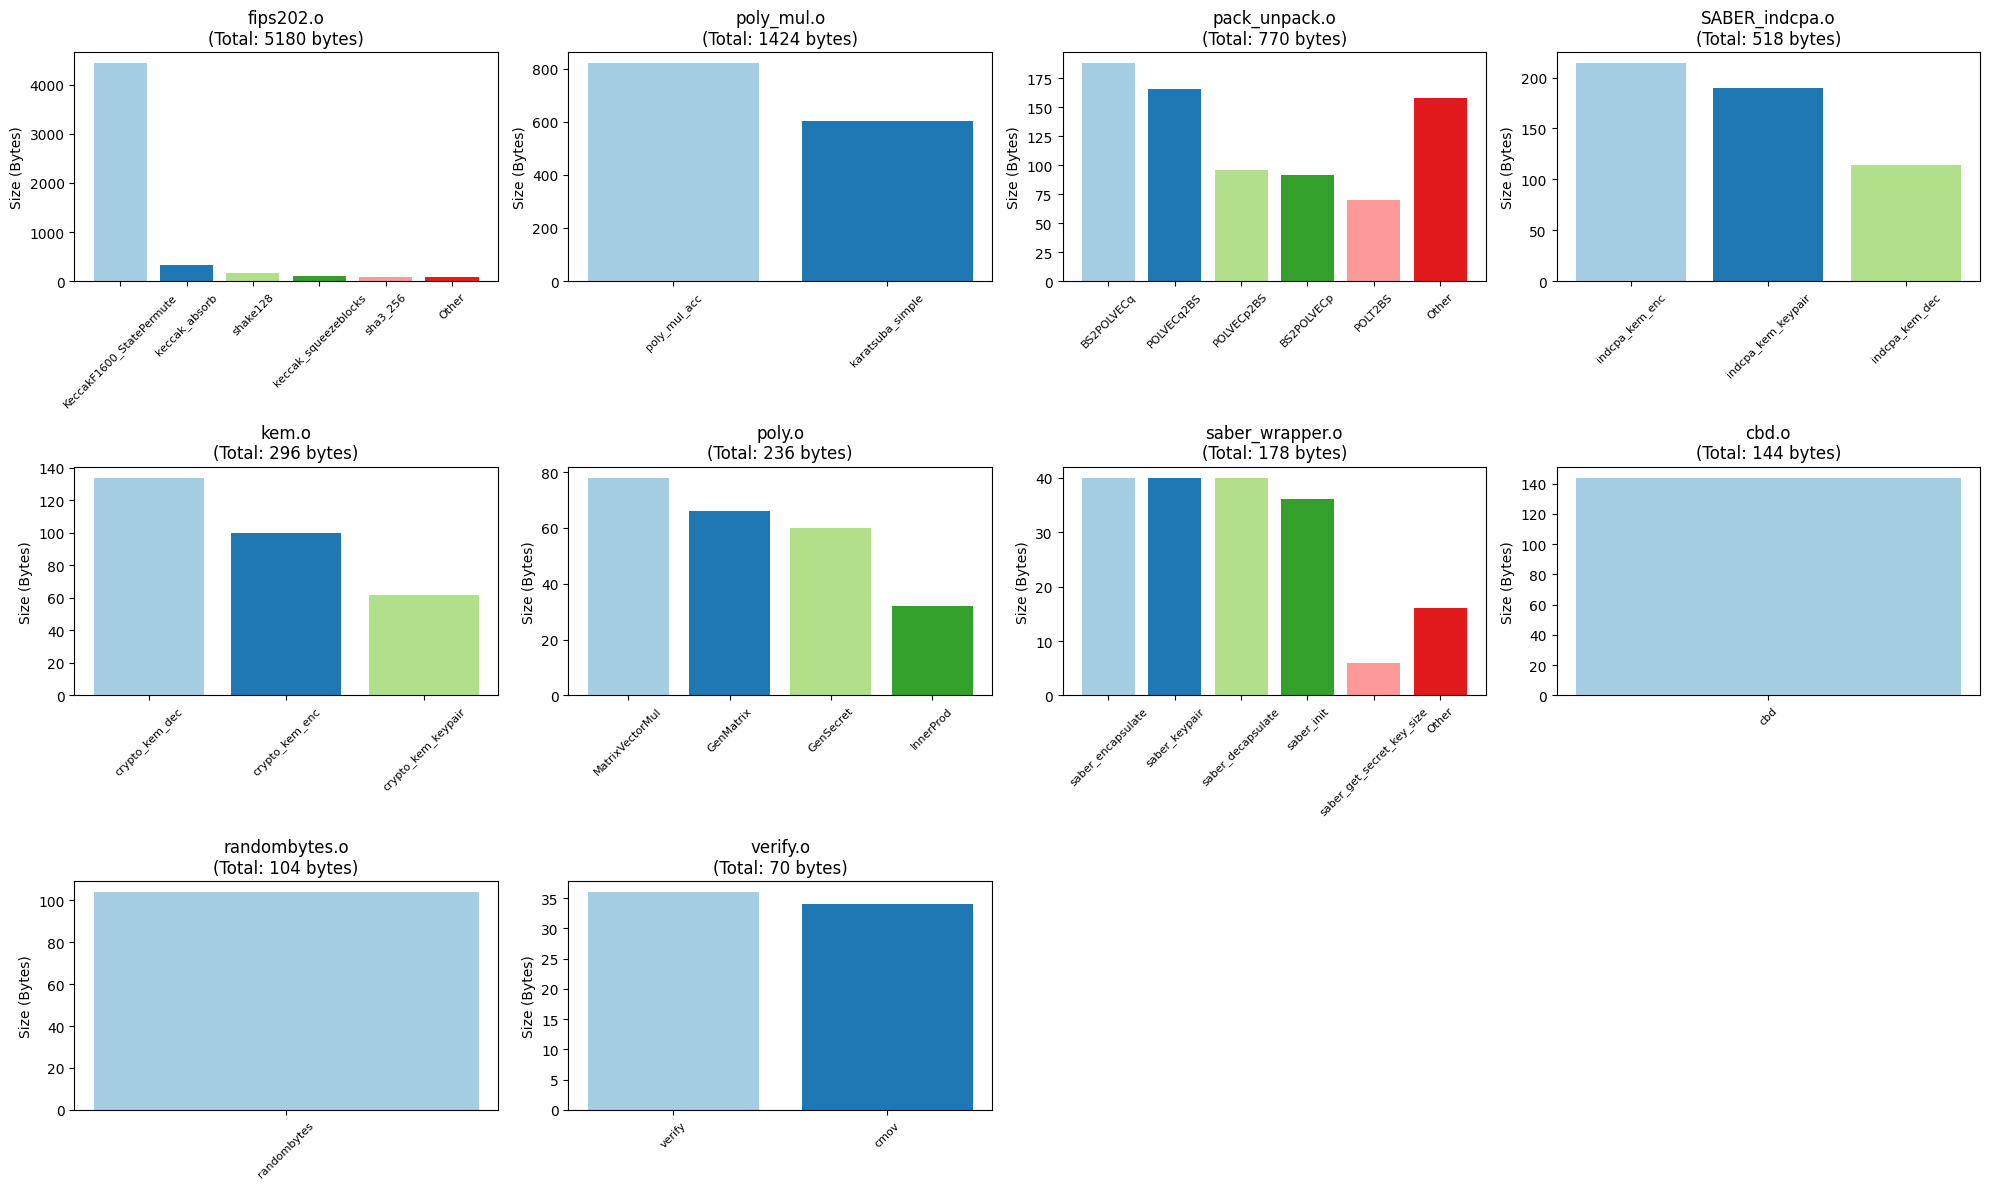

In [46]:
dfFilteredSaber = dfObjectSaber[dfObjectSaber['File'].isin(objectFilesSaber)]

dfSaberCode = dfFilteredSaber[dfFilteredSaber.Type == 'Code']
plot_memory_breakdown(dfSaberCode, "Code","Saber")

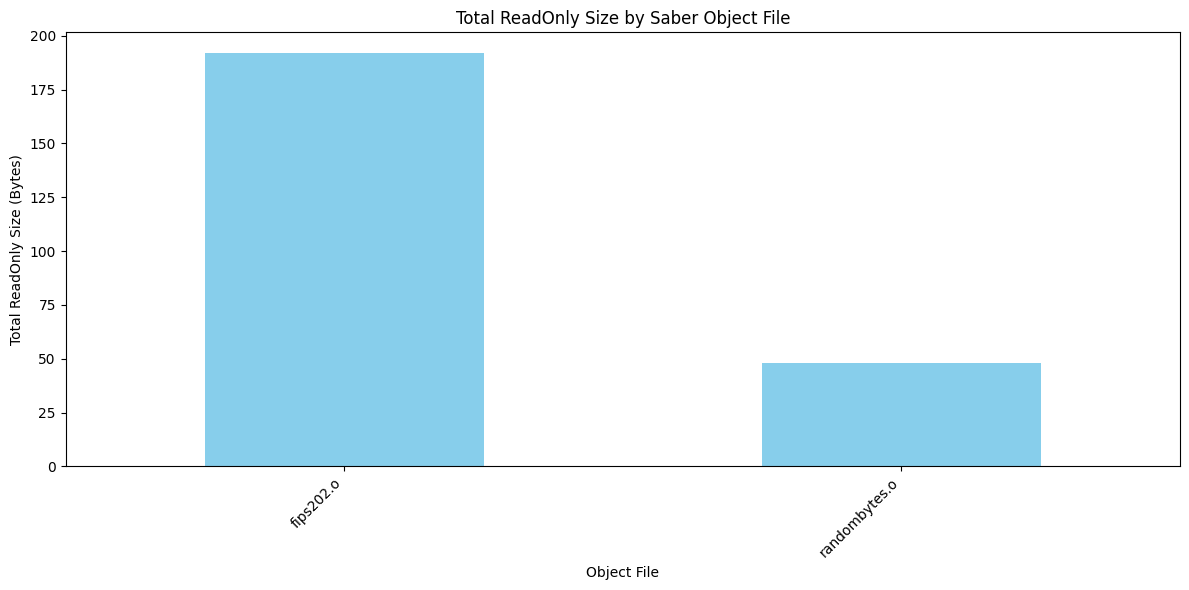

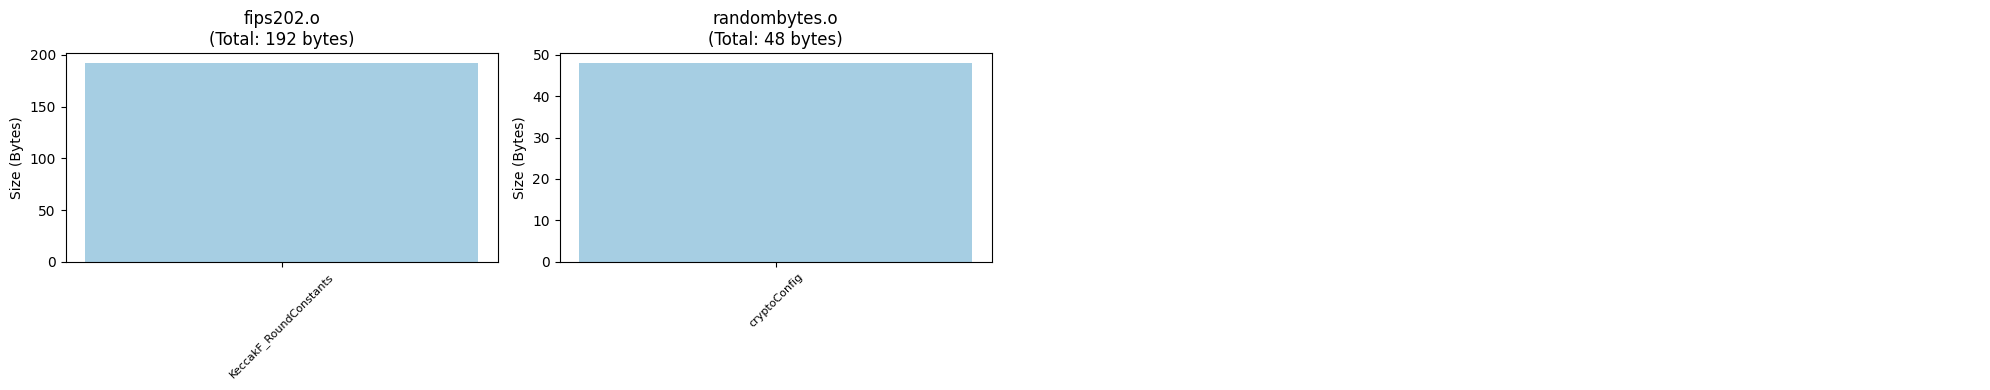

In [47]:
dfSaberReadOnly = dfFilteredSaber[dfFilteredSaber.Type == 'ReadOnly']
plot_memory_breakdown(dfSaberReadOnly, "ReadOnly","Saber")

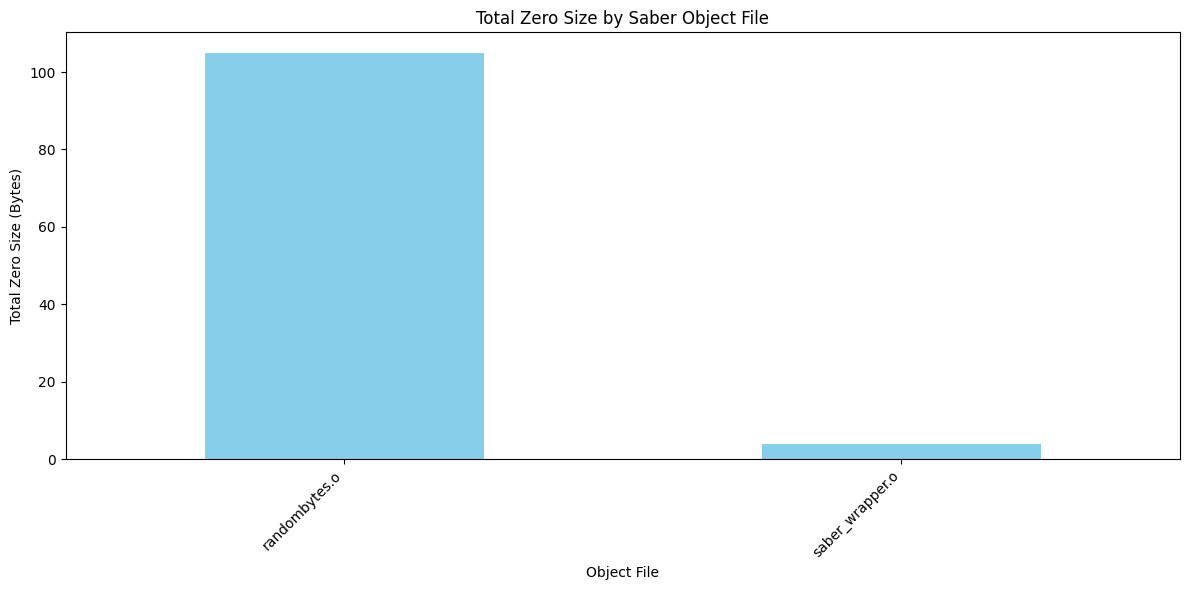

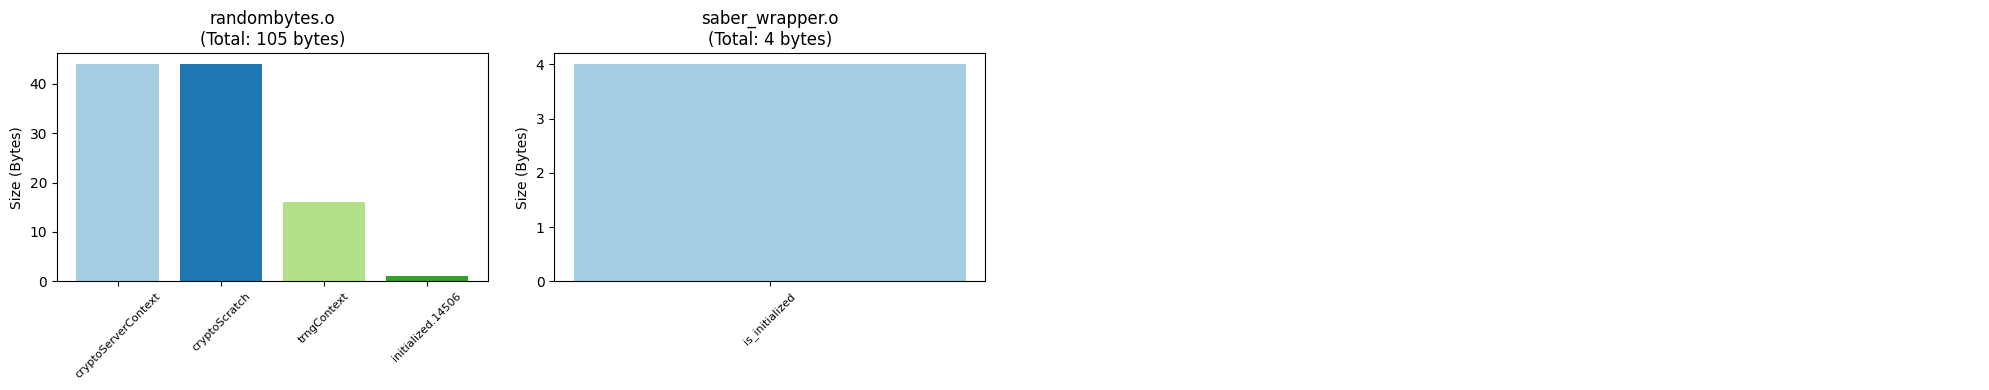

In [48]:
dfSaberZero = dfFilteredSaber[dfFilteredSaber.Type == 'Zero']
plot_memory_breakdown(dfSaberZero, "Zero","Saber")